In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams['pdf.fonttype'] = 'truetype'
fontProperties = {'family': 'sans-serif', 'sans-serif': ['Helvetica'], 'weight': 'normal', 'size': 12}
plt.rc('font', **fontProperties)

from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
from matplotlib import gridspec
from matplotlib.colors import SymLogNorm
from scipy.optimize import curve_fit

In [2]:
def powerLaw(x, a, b):
    return a*x**b

In [3]:
n_slice = np.array([16, 8, 4, 2])
n_rank_ls = np.array([1, 2, 4, 8])

In [4]:
eopch_time_s = np.array([3778.8, 2104.9, 1316.2, 1158.5])

In [7]:
popt, pcov = curve_fit(powerLaw, n_rank_ls, eopch_time_s)

/tmp/ipykernel_13852/3968480268.py:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim([0,10])
/tmp/ipykernel_13852/3968480268.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim([0,10000])


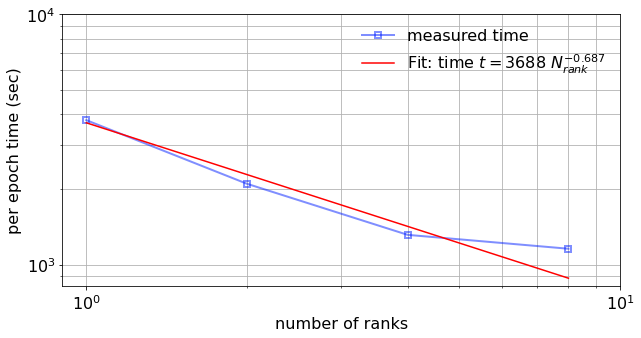

In [16]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.plot(n_rank_ls, eopch_time_s,  '-s', color='#011FFF', linewidth=2, markerfacecolor='none', markeredgecolor='#011FFF', markeredgewidth=2, alpha=0.5, label = 'measured time')
ax.plot(n_rank_ls, powerLaw(n_rank_ls, *popt), 'r-', label='Fit: time ' + r'$t = %.0f\,\, N_{rank}^{%5.3f}$' % tuple(popt))
ax.grid(True, which='both')
# ax.set_title("Strong scaling test on a 128 x 128 x 128 object", fontsize=16)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim([0,10])
ax.set_ylim([0,10000])
ax.set_xlabel("number of ranks", fontsize=16)
ax.set_ylabel("per epoch time (sec)", fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.legend(frameon=False, fontsize=16)


plt.savefig('Strong_scaling_test_size_128.pdf', format='pdf', dpi=600)

# Amhahl's law

In [75]:
def speedUp(s, n_rank):
    return 1 / (s + (1-s)/n_rank)

In [87]:
speedUp_measured = eopch_time_s[0] / eopch_time_s

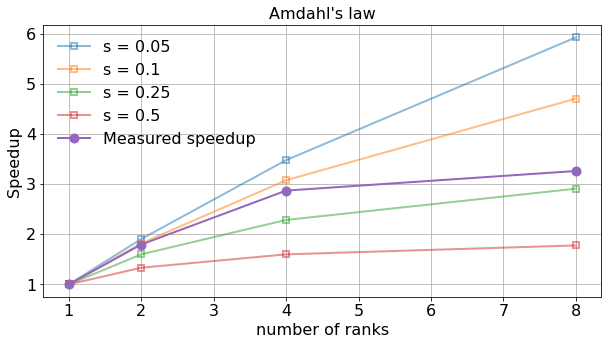

In [104]:
s_ls = np.array([0.05, 0.1, 0.25, 0.5])
n_rank_ls = np.array([1, 2, 4, 8])

SpeedUp = np.zeros((len(s_ls), len(n_rank_ls)))
for idx_s, s in enumerate(s_ls):
    for idx_n, n_rank in enumerate(n_rank_ls):
        SpeedUp[idx_s, idx_n] = speedUp(s, n_rank)
        
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title("Amdahl's law", fontsize = 16)

for idx_s, s in enumerate(s_ls): 
    ax.plot(n_rank_ls, SpeedUp[idx_s,:], '-s', linewidth=2, markerfacecolor='none', markeredgewidth=2, alpha=0.5, label = f's = {s}')

ax.plot(n_rank_ls, speedUp_measured, '-o', linewidth=2, alpha=1.0, label = f'Measured speedup', markersize = 9)

ax.grid(True, which='both')
ax.set_xlabel("number of ranks", fontsize=16)
ax.set_ylabel("Speedup", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.legend(frameon=False, fontsize=16)


plt.savefig('Speedup_Curve.pdf', format='pdf', dpi=600)